In [188]:
# Importing the neccessary libraries.
import os
import pandas as pd
import numpy as np
import matplotlib as mlt
import seaborn as sns
from scipy.stats import chi2_contingency

pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 140)
pd.set_option('display.max_rows', 200)

sns.set(style="darkgrid", color_codes=True)
%matplotlib inline

In [270]:
# Installing pyforest for lazy import of neccessary libraries.
# pip install pyforest

SyntaxError: invalid syntax (<ipython-input-270-47d00849fb7f>, line 2)

In [190]:
# Setting the working directory.
os.chdir("D:/PROJECT DS/1.EMPLOYEE ABSENTISM")

In [191]:
# Importing the given dataset.
d1 = pd.read_excel("Absenteeism_at_work.xls")

In [192]:
# Creating a copy of the data to keep an original dataset separately.
data = d1.copy()

In [193]:
# overview of the dataset. 
data.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26.0,7.0,3,1,289.0,36.0,13.0,33.0,239554.0,97.0,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,36,0.0,7.0,3,1,118.0,13.0,18.0,50.0,239554.0,97.0,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
2,3,23.0,7.0,4,1,179.0,51.0,18.0,38.0,239554.0,97.0,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7,7.0,7.0,5,1,279.0,5.0,14.0,39.0,239554.0,97.0,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,11,23.0,7.0,5,1,289.0,36.0,13.0,33.0,239554.0,97.0,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0


In [194]:
# Getting concise summary of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
ID                                 740 non-null int64
Reason for absence                 737 non-null float64
Month of absence                   739 non-null float64
Day of the week                    740 non-null int64
Seasons                            740 non-null int64
Transportation expense             733 non-null float64
Distance from Residence to Work    737 non-null float64
Service time                       737 non-null float64
Age                                737 non-null float64
Work load Average/day              730 non-null float64
Hit target                         734 non-null float64
Disciplinary failure               734 non-null float64
Education                          730 non-null float64
Son                                734 non-null float64
Social drinker                     737 non-null float64
Social smoker                      736 non-null float64
Pet  

In [195]:
# Checking for no. of unique values.
data.nunique()

ID                                 36
Reason for absence                 28
Month of absence                   13
Day of the week                     5
Seasons                             4
Transportation expense             24
Distance from Residence to Work    25
Service time                       18
Age                                22
Work load Average/day              38
Hit target                         13
Disciplinary failure                2
Education                           4
Son                                 5
Social drinker                      2
Social smoker                       2
Pet                                 6
Weight                             26
Height                             14
Body mass index                    17
Absenteeism time in hours          19
dtype: int64

In [196]:
# Checking for unique values.
data['Month of absence'].value_counts()

# '0.0' is an error.So we have to replace it with 'nan' values
data['Month of absence'] = data['Month of absence'].replace(0.0,np.nan)

In [197]:
data.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week', 'Seasons', 'Transportation expense',
       'Distance from Residence to Work', 'Service time', 'Age', 'Work load Average/day ', 'Hit target', 'Disciplinary failure',
       'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index', 'Absenteeism time in hours'],
      dtype='object')

In [198]:
# Renaming the variable "Work load Average/day " to "Work load Average/day".
data = data.rename(columns = {'Work load Average/day ':'Work load Average/day'})

# Extra space in the end is removed.

In [199]:
# Correcting the scale :
data['Work load Average/day'] = data['Work load Average/day']/1000
data['Work load Average/day'].head()

0    239.554
1    239.554
2    239.554
3    239.554
4    239.554
Name: Work load Average/day, dtype: float64

In [200]:
# Conversion of variables into proper data types
data['ID'] = data['ID'].astype('category')  # integer to object
data['Reason for absence'] = data['Reason for absence'].astype('category')
data['Month of absence'] = data['Month of absence'].astype('category')
data['Day of the week'] = data['Day of the week'].astype('category')
data['Seasons'] = data['Seasons'].astype('category')
data['Transportation expense'] = data['Transportation expense'].astype('float64')
data['Disciplinary failure'] = data['Disciplinary failure'].astype('category')
data['Education'] = data['Education'].astype('category')
data['Social drinker'] = data['Social drinker'].astype('category')
data['Social smoker'] = data['Social smoker'].astype('category')

In [201]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
ID                                 740 non-null category
Reason for absence                 737 non-null category
Month of absence                   736 non-null category
Day of the week                    740 non-null category
Seasons                            740 non-null category
Transportation expense             733 non-null float64
Distance from Residence to Work    737 non-null float64
Service time                       737 non-null float64
Age                                737 non-null float64
Work load Average/day              730 non-null float64
Hit target                         734 non-null float64
Disciplinary failure               734 non-null category
Education                          730 non-null category
Son                                734 non-null float64
Social drinker                     737 non-null category
Social smoker                      736 non-null

In [202]:
# Now Checking for the duplicate values
duplicate_rows = data[data.duplicated(keep='first')]
print(duplicate_rows)
print(data.duplicated().sum())


# There are 25 duplicate records in the datasets. We can remove them.

     ID Reason for absence Month of absence Day of the week Seasons  Transportation expense  Distance from Residence to Work  \
305   5               23.0             10.0               2       4                   235.0                             20.0   
351   3               28.0             12.0               6       4                   179.0                             51.0   
376   3               27.0              2.0               4       2                   179.0                             51.0   
385   3               27.0              2.0               4       2                   179.0                             51.0   
386   3               27.0              2.0               6       2                   179.0                             51.0   
388   3               27.0              2.0               4       2                   179.0                             51.0   
389   3               27.0              2.0               6       2                   179.0             

In [203]:
# Dropping all the duplicate rows and verifying 
data = data.drop_duplicates(keep='first',inplace=False)
data.duplicated().sum()
data.shape
# Now our dataset has no duplicate records.

(715, 21)

In [204]:
# Removing absenteeism hours equal to 0 
data = data.loc[data['Absenteeism time in hours']!= 0,:]
data.shape

(679, 21)

# MISSING VALUE ANALYSIS

In [205]:
# Checking if the data has missing values.
data.isnull().sum()

ID                                  0
Reason for absence                  3
Month of absence                    1
Day of the week                     0
Seasons                             0
Transportation expense              7
Distance from Residence to Work     3
Service time                        3
Age                                 3
Work load Average/day              10
Hit target                          6
Disciplinary failure                6
Education                          10
Son                                 6
Social drinker                      3
Social smoker                       4
Pet                                 2
Weight                              1
Height                             13
Body mass index                    29
Absenteeism time in hours          22
dtype: int64

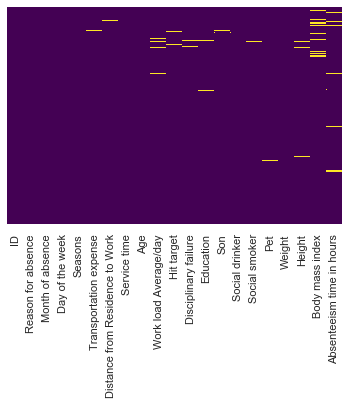

In [206]:
# We can also visualize missing values in Heatmap.
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# we can easily conclude that the last two columns are having missing values.

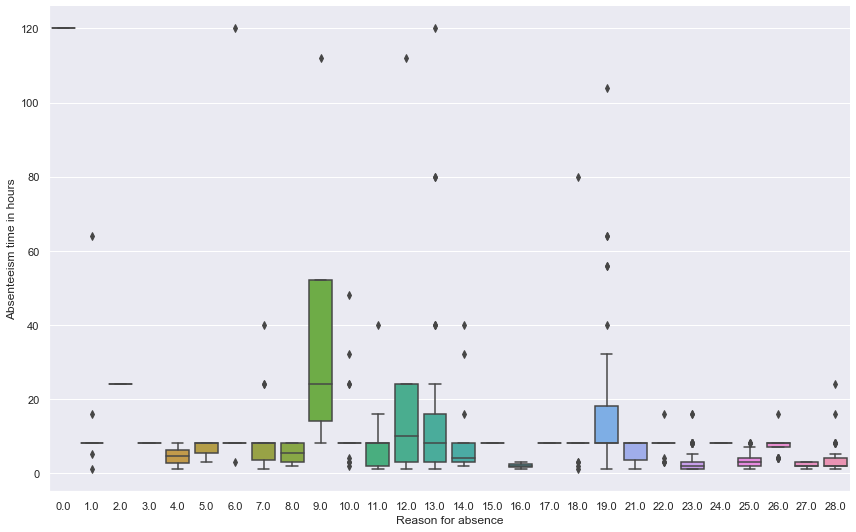

In [207]:
sns.catplot(x='Reason for absence', y="Absenteeism time in hours", kind="box", data=data,height=7.5,aspect=12/7.5)

In [208]:
# Filling missing values and zero values:'Reason for absence'
data.loc[data['Reason for absence'].isnull(),'Reason for absence'] = 27
data.loc[data['Reason for absence']==0,'Reason for absence'] = 23


In [209]:
# Finding and Filling missing values:'Month of absence'
d=pd.DataFrame(data.loc[data['Month of absence'].isnull()])
d

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
66,3,23.0,NaN,6,4,179.0,51.0,18.0,38.0,253.465,93.0,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,3.0


In [210]:
data.loc[data['Month of absence'].isnull(),'Month of absence'] = 10

In [211]:
data.isnull().sum()

ID                                  0
Reason for absence                  0
Month of absence                    0
Day of the week                     0
Seasons                             0
Transportation expense              7
Distance from Residence to Work     3
Service time                        3
Age                                 3
Work load Average/day              10
Hit target                          6
Disciplinary failure                6
Education                          10
Son                                 6
Social drinker                      3
Social smoker                       4
Pet                                 2
Weight                              1
Height                             13
Body mass index                    29
Absenteeism time in hours          22
dtype: int64

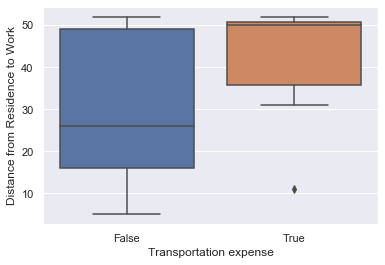

In [212]:
# Finding and Filling missing values:'Transportation expense'
sns.boxplot(x=data['Transportation expense'].isnull(), y=data['Distance from Residence to Work'])


In [213]:
data.loc[(data['Transportation expense'].isnull()) & (data['Distance from Residence to Work']==50),\
'Transportation expense'] = data.loc[data['Distance from Residence to Work']==50,'Transportation expense'].median()

data.loc[(data['Transportation expense'].isnull()) & (data['Distance from Residence to Work']==51),\
'Transportation expense'] = data.loc[data['Distance from Residence to Work']==51,'Transportation expense'].median()

data.loc[(data['Transportation expense'].isnull()) & (data['Distance from Residence to Work']==52),\
'Transportation expense'] = data.loc[data['Distance from Residence to Work']==52,'Transportation expense'].median()

data.loc[(data['Transportation expense'].isnull()) & (data['Distance from Residence to Work']==11),\
'Transportation expense'] = data.loc[data['Distance from Residence to Work']==11,'Transportation expense'].median()


data.loc[(data['Transportation expense'].isnull()) & (data['Distance from Residence to Work']==31),\
'Transportation expense'] = data.loc[data['Distance from Residence to Work']==31,'Transportation expense'].median()

data.loc[(data['Transportation expense'].isnull()) & (data['ID']==22),\
'Transportation expense'] = data.loc[data['ID']==22,'Transportation expense'].median()

In [214]:
data.isnull().sum()

ID                                  0
Reason for absence                  0
Month of absence                    0
Day of the week                     0
Seasons                             0
Transportation expense              0
Distance from Residence to Work     3
Service time                        3
Age                                 3
Work load Average/day              10
Hit target                          6
Disciplinary failure                6
Education                          10
Son                                 6
Social drinker                      3
Social smoker                       4
Pet                                 2
Weight                              1
Height                             13
Body mass index                    29
Absenteeism time in hours          22
dtype: int64

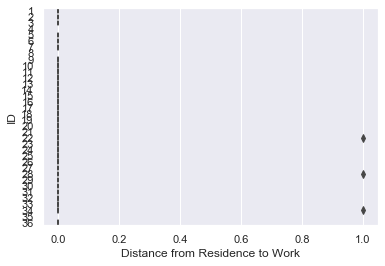

In [215]:
# Finding and Filling missing values:'Transportation expense'
sns.boxplot(x=data["Distance from Residence to Work"].isnull(),y=data["ID"])

In [216]:
data.loc[(data['Distance from Residence to Work'].isnull()) & (data['ID']==22),\
'Distance from Residence to Work'] = data.loc[data['ID']==22,'Distance from Residence to Work'].mode()[0]

data.loc[(data['Distance from Residence to Work'].isnull()) & (data['ID']==34),\
'Distance from Residence to Work'] = data.loc[data['ID']==34,'Distance from Residence to Work'].mode()[0]


data.loc[(data['Distance from Residence to Work'].isnull()) & (data['ID']==28),\
'Distance from Residence to Work'] = data.loc[data['ID']==28,'Distance from Residence to Work'].mode()[0]

In [217]:
# Finding and Filling missing values:'Service time'
data['Service time'].fillna(data['Service time'].mean(),inplace=True)

In [218]:
# Finding and Filling missing values:'Age'
data['Age'].fillna(data['Age'].mean(),inplace=True)

In [219]:
# Finding and Filling missing values:'Work load Average/day'
data['Work load Average/day'].fillna(data['Work load Average/day'].median(),inplace=True)

In [220]:
# Finding and Filling missing values:'Hit target'
data['Hit target'].fillna(data['Hit target'].mean(),inplace=True)

In [221]:
# Finding and Filling missing values:'Disciplinary failure'
data['Disciplinary failure'].fillna(data['Disciplinary failure'].value_counts().index[0],inplace=True)

In [222]:
# Finding and Filling missing values:'Education'
data['Education'].fillna(data['Education'].value_counts().index[0],inplace=True)

In [223]:
# Finding and Filling missing values:'Son'
data['Son'].fillna(data['Son'].mean(),inplace=True)

In [224]:
# Finding and Filling missing values:'Social drinker'
data['Social drinker'].fillna(data['Social drinker'].value_counts().index[0],inplace=True)

In [225]:
# Finding and Filling missing values:'Social smoker'
data['Social smoker'].fillna(data['Social smoker'].value_counts().index[0],inplace=True)

In [226]:
# Finding and Filling missing values:'Pet'
data['Pet'].fillna(data['Pet'].mean(),inplace=True)

In [227]:
# Finding and Filling missing values:'Body mass index'
data['Body mass index'].fillna(data['Body mass index'].mean(),inplace=True)

In [228]:
# Finding and Filling missing values:'Absenteeism time in hours'
data['Absenteeism time in hours'].fillna(data['Absenteeism time in hours'].mean(),inplace=True)

In [229]:
data.isnull().sum()

ID                                  0
Reason for absence                  0
Month of absence                    0
Day of the week                     0
Seasons                             0
Transportation expense              0
Distance from Residence to Work     0
Service time                        0
Age                                 0
Work load Average/day               0
Hit target                          0
Disciplinary failure                0
Education                           0
Son                                 0
Social drinker                      0
Social smoker                       0
Pet                                 0
Weight                              1
Height                             13
Body mass index                     0
Absenteeism time in hours           0
dtype: int64

In [230]:
# Dropping the Height and Weight column:
data = data.drop(columns=['Height','Weight'],axis=1,inplace=False)

In [231]:
data.shape

(679, 19)

# Data Visualization

In [232]:
# Separating categorical and continous variables:
categ = data.select_dtypes(include='category')
conti = data.select_dtypes(include='float64')

In [233]:
# 5-point summary of the data
summary_categ = data.describe(include='category')
summary_num = data.describe()

print (summary_categ,summary_num)


         ID  Reason for absence  Month of absence  Day of the week  Seasons  Disciplinary failure  Education  Social drinker  \
count   679               679.0             679.0              679      679                 679.0      679.0           679.0   
unique   33                27.0              12.0                5        4                   2.0        4.0             2.0   
top       3                23.0               3.0                2        4                   0.0        1.0             1.0   
freq     97               154.0              80.0              153      177                 672.0      558.0           379.0   

        Social smoker  
count           679.0  
unique            2.0  
top               0.0  
freq            630.0          Transportation expense  Distance from Residence to Work  Service time         Age  Work load Average/day  Hit target         Son  \
count              679.000000                       679.000000    679.000000  679.000000            

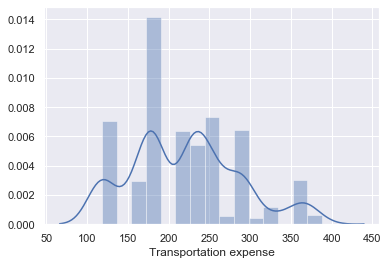

In [234]:
# Visualizing continuous data distribution:'Transportation expense'
sns.distplot(data['Transportation expense'])

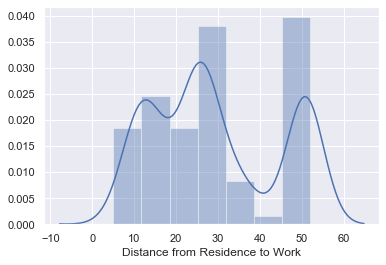

In [235]:
# Visualizing continuous data distribution:'Distance from Residence to Work'
sns.distplot(data['Distance from Residence to Work'])

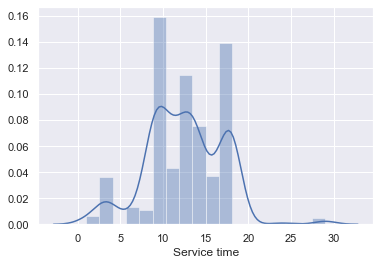

In [236]:
# Visualizing continuous data distribution:'Service time'
sns.distplot(data['Service time'])

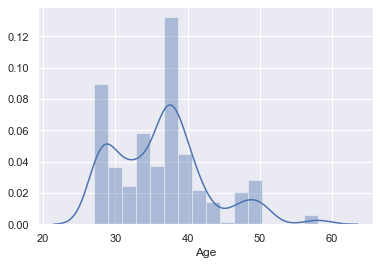

In [237]:
# Visualizing continuous data distribution:'Age'
sns.distplot(data["Age"])

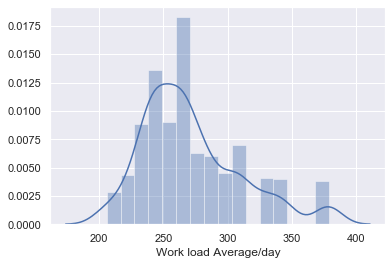

In [238]:
# Visualizing continuous data distribution:'Work load Average/day'
sns.distplot(data["Work load Average/day"])

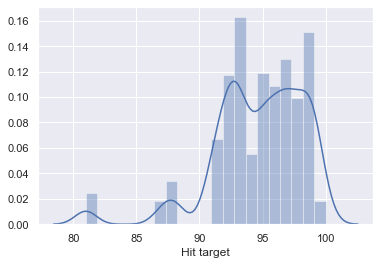

In [239]:
# Visualizing continuous data distribution:'Hit target'
sns.distplot(data["Hit target"])

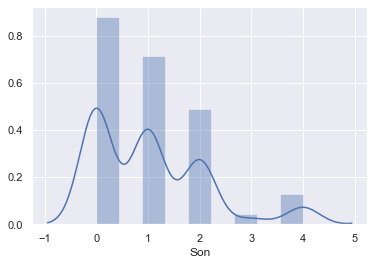

In [240]:
# Visualizing continuous data distribution:'Son'
sns.distplot(data["Son"])

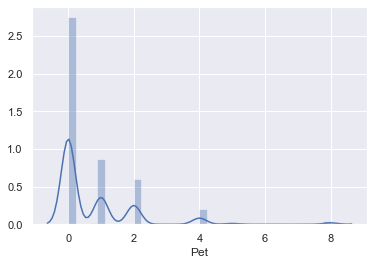

In [241]:
# Visualizing continuous data distribution:'Pet'
sns.distplot(data["Pet"])

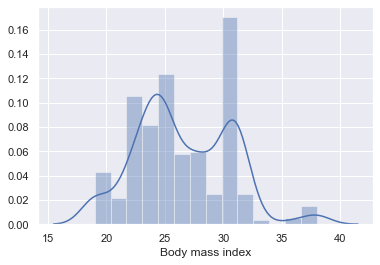

In [242]:
# Visualizing continuous data distribution:'Body mass index'
sns.distplot(data["Body mass index"])

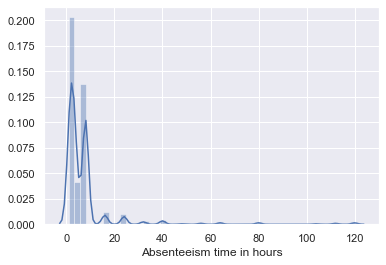

In [243]:
# Visualizing continuous data distribution:'Absenteeism time in hours'
sns.distplot(data["Absenteeism time in hours"])

In [244]:
# All the distributions are skewed, might because of the outliers.

# OUTLIER ANALYSIS

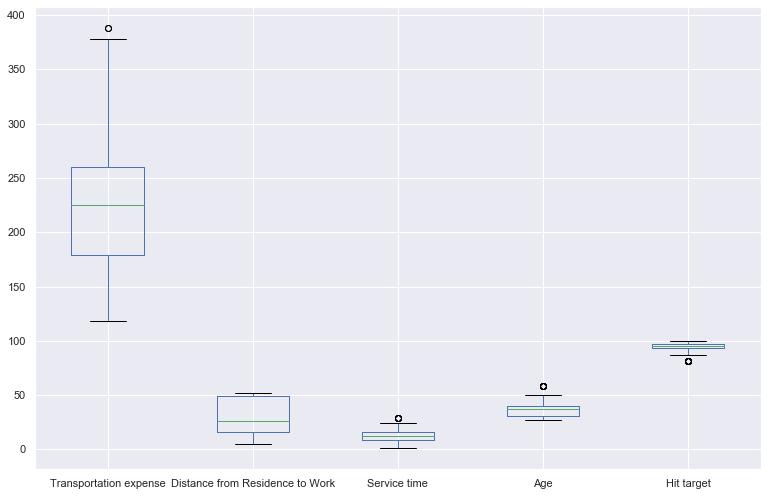

In [245]:
# Box-Plots for continuous variables:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 13
fig_size[1] = 8.5
plt.rcParams["figure.figsize"] = fig_size
data.boxplot(column=['Transportation expense','Distance from Residence to Work', 'Service time', 'Age','Hit target'])

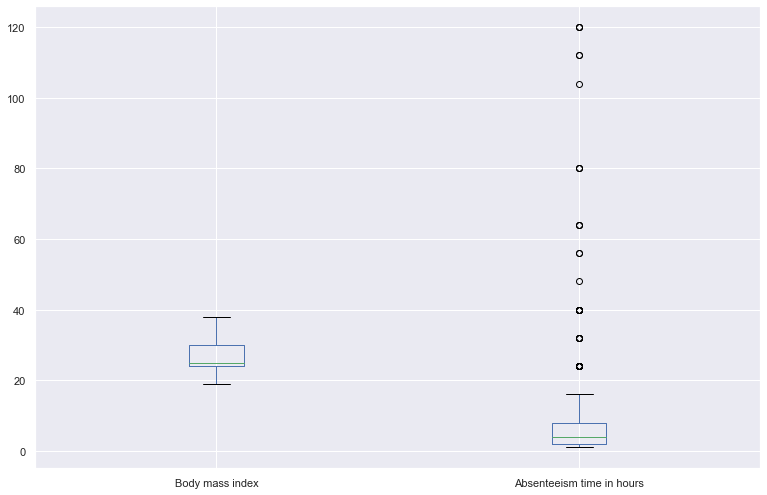

In [246]:
# Box-Plots for continuous variables:
data.boxplot(column = ['Body mass index','Absenteeism time in hours'])

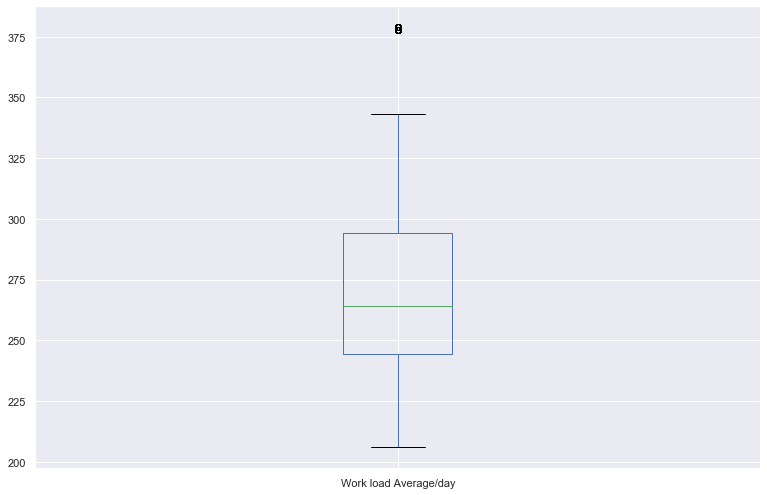

In [247]:
data.boxplot(column=['Work load Average/day'])

In [248]:
# As we can observe outliers in many variables. Now removing them to have proper distribution of data.

In [249]:
for i in ['Transportation expense','Service time','Age','Work load Average/day','Hit target',\
'Absenteeism time in hours']:
    q75,q25 = np.percentile(data.loc[:,i],[75,25])
    iqr = q75-q25
    min = q25-1.5*iqr
    max = q75+1.5*iqr
    data = data.drop(data[data.loc[:,i] < min].index)
    data = data.drop(data[data.loc[:,i] > max].index)

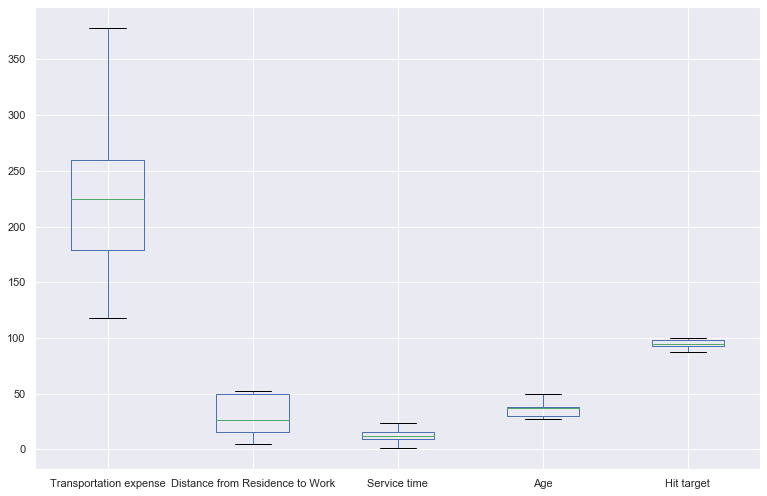

In [250]:
# All the outliers are removed :
data.boxplot(column=['Transportation expense','Distance from Residence to Work', 'Service time', 'Age','Hit target'])

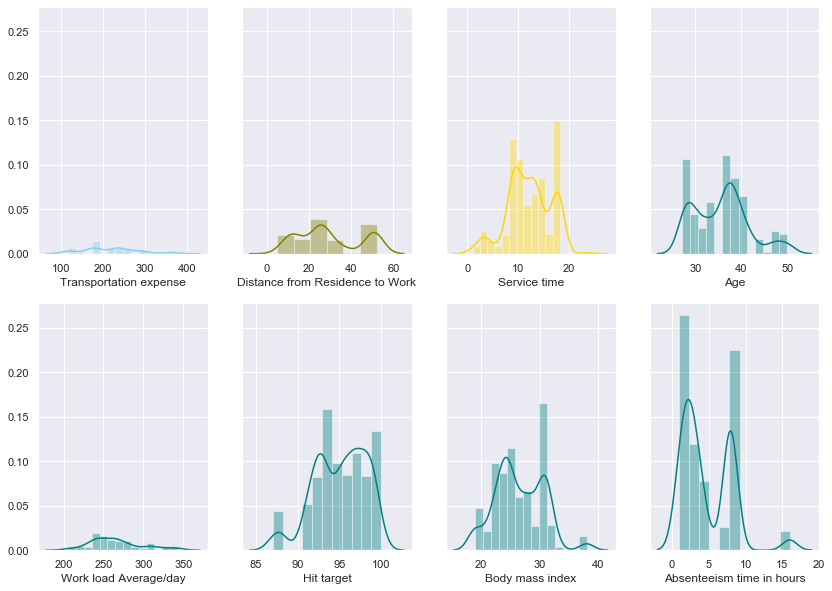

In [251]:
# Plotting bar graphs for continuous variables---Univariate analysis
f, axes = plt.subplots(2,4,figsize=(14, 10), sharey=True)
sns.distplot( data["Transportation expense"] , color="skyblue", ax=axes[0, 0])
sns.distplot( data["Distance from Residence to Work"] , color="olive", ax=axes[0, 1])
sns.distplot( data["Service time"] , color="gold", ax=axes[0, 2])
sns.distplot( data["Age"] , color="teal", ax=axes[0, 3])
sns.distplot( data["Work load Average/day"] , color="teal", ax=axes[1, 0])
sns.distplot( data["Hit target"] , color="teal", ax=axes[1, 1])
sns.distplot( data["Body mass index"] , color="teal", ax=axes[1, 2])
sns.distplot( data["Absenteeism time in hours"] , color="teal", ax=axes[1, 3])


# Conclusion: 'Work load average/day' has higher scale.

# Correlation analysis

In [252]:
# Converting variables to categorical variables
categ_var = ['ID','Reason for absence', 'Month of absence', 'Day of the week', 'Seasons','Disciplinary failure','Education',\
'Son', 'Social drinker', 'Social smoker', 'Pet']

for i in categ_var:
    data[i] = data[i].astype('category')

In [253]:
conti_var = ['Transportation expense','Distance from Residence to Work','Service time','Age','Work load Average/day','Hit target','Body mass index',]

In [254]:
factors_paired = [(i,j) for i in categ_var for j in categ_var] 
chi2, p_values =[], []
for f in factors_paired:
    if f[0] != f[1]:
        chitest = chi2_contingency(pd.crosstab(data[f[0]], data[f[1]]))
        chi2.append(chitest[0])
        p_values.append(chitest[1])
    else:
        chi2.append(0)
        p_values.append(0)

p1 = np.array(p_values).reshape((10,10))
p1 = pd.DataFrame(p1, index=categ_var, columns=categ_var)
p1

ValueError: cannot reshape array of size 121 into shape (10,10)

In [ ]:
#Dropping Seasons since p-value of 'Seasons' versus 'Month of absence' is 0.00(<0.05) rejecting null hypothesis that the two variables are independent.
data = data.drop(['Seasons'],axis=1)

In [ ]:
# Correlation test for continuous independent variables
data.loc[:,conti_var].corr()
# No two variables have correlation coeff. > 0.95 so we will not drop any continuous independent variables.

# Relationships of categorical independent variables with dependent variable

In [ ]:
# 'Reason for absence' Vs. 'Absenteeism time in hours'
def relationship(a,b):
    df = data.groupby(a)[b].sum()
    df = df.reset_index()
    df[b] = df[b]*100/sum(data[b])
    df = df.sort_values(by=['Absenteeism time in hours'])
    print(df)
    return df.plot.barh(x=a,y=b)
relationship('Reason for absence','Absenteeism time in hours')

In [ ]:
# Top 5 categories in order of Absenteeism time are:

#Category 23:Blood donation - 16.74% of total time.
#Category 28:dental consultation - 10.20 % 0f total time
#Category 22:patient follow-up - 9.68 % of total time
#Category 13:Diseases of the musculoskeletal system and connective tissue - 9.68 % of total time
#Category 26:unjustified absence - 8.39 % of total time

# CONCLUSIONS:
# 1.Medical consultation may be brought down by optimizing workloads.
# 2.Dental consultation time may be reduced by informing employees of the dental health guidelines so that they can take better care of their teeth.
# 3.Musculoskeletal system disease is the major reason of absenteeism. Bad working posture & high workload are possible reasons for the high incidence \
#   of musculoskeletal disease. Company should conduct a study on the working postures of people and go for more ergonomic workplace design. Company \
#   should try to optimize workload keeping in mind occupational health of working people.
# 4.Unjustified absence is too high.Company should try to reduce high workloads so that employees don't feel work stress and take unjustified absence leave.

In [ ]:
# 'Month of absence' Vs. 'Absenteeism time in hours'
relationship('Month of absence','Absenteeism time in hours')

In [ ]:
#Top 3 months in order of Absenteeism time are:

# Month 3:March - 14.96 % of total time
# Month 7:July - 12.51 % of total time
# Month 10:October - 10.88 % of total time

# CONCLUSIONS: 
# 1.Work load in the above months should be reduced.

In [ ]:
# 'Day of the week' Vs. 'Absenteeism time in hours'
relationship('Day of the week','Absenteeism time in hours')

In [ ]:
# Top 3 days in order of Absenteeism time are:

# Day 2:Monday -  22.44 % of total time
# Day 3:Tuesday - 21.30 % of total time
# Day 4:Wednesday - 19.43 % of total time

In [ ]:
#'Education' Vs. 'Absenteeism time in hours'
relationship('Education','Absenteeism time in hours')

In [ ]:
# 79.73 % of absenteeism time is contributed by people having high school education

In [ ]:
# 'Son' Vs. 'Absenteeism time in hours'
relationship('Son','Absenteeism time in hours')

In [ ]:
# Top 3 categories in order of Absenteeism time are:

#Category 0:No son - 35.44 % of total time
#Category 1:One son - 28.59 % of total time
#Category 2:Two sons - 24.97 % of total time

# CONCLUSION:People with no son are taking most of absenteeism time.

# Forecasting Absenteeism.time.in.hours in hours per month for 2011

In [ ]:
data.head()

In [ ]:
# Aggregating absence hrs. by month
monthly_absence = data.groupby('Month of absence')['Absenteeism time in hours'].sum()
monthly_absence

In [ ]:
monthly_absence = monthly_absence.reset_index()
monthly_absence

In [ ]:
# Dividing the dataset by 3
# As the original dataset is the data for 3 years. Since this information is not provided to us in the original question but months are repeated thrice hence We assume this. 
# Divinding absence hrs. by 3 since this data is of 3 years from July,2007 to June,2010.

In [ ]:
monthly_absence['Absenteeism hours per month'] = monthly_absence['Absenteeism time in hours']/3

In [ ]:
monthly_absence['Month of absence'] = monthly_absence['Month of absence'].astype('int')
monthly_absence

In [ ]:
monthly_absence = monthly_absence.set_index('Month of absence')
monthly_absence

In [ ]:
monthly_absence = monthly_absence.drop(['Absenteeism time in hours'],axis=1)

In [ ]:
# TOTAL LOSS IN 2011
total_loss = monthly_absence['Absenteeism hours per month']
total_loss

# CONCLUSION : This is the total loss in 2011 if the given trend of absenteeism continues.

# FEATURE SCALING

In [256]:
# Normalization of continous variables
for i in conti_var:
    if i == 'Absenteeism time in hours':
        continue
    data[i] = (data[i] - data[i].min())/(data[i].max()-data[i].min())

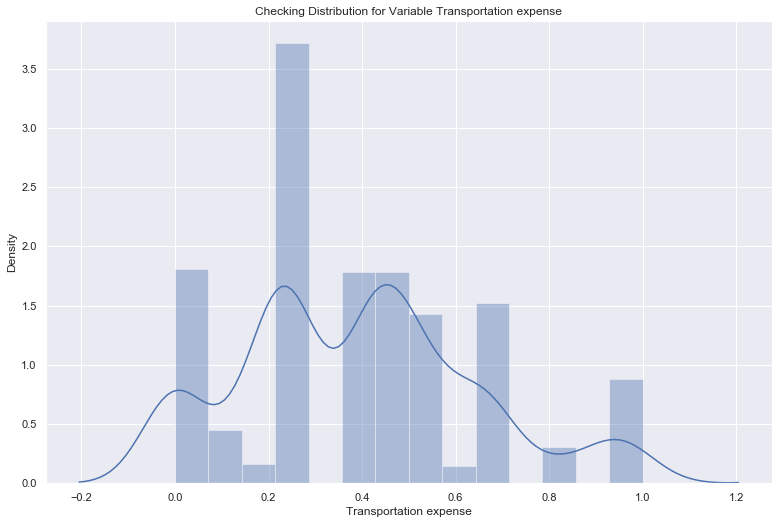

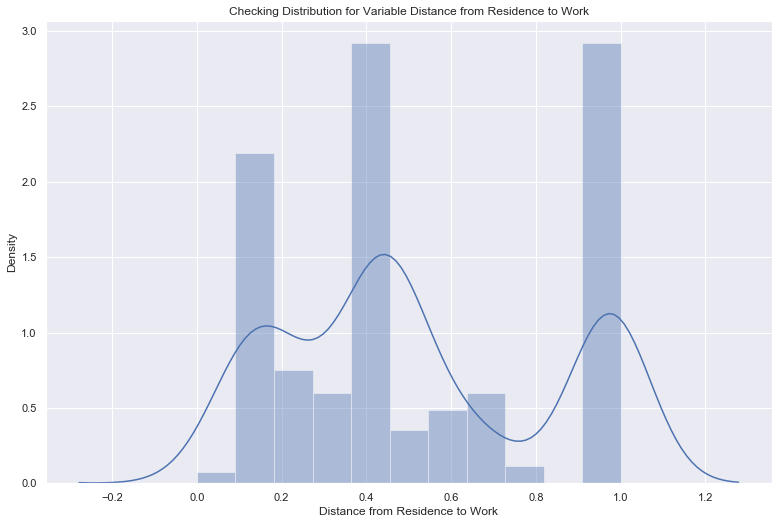

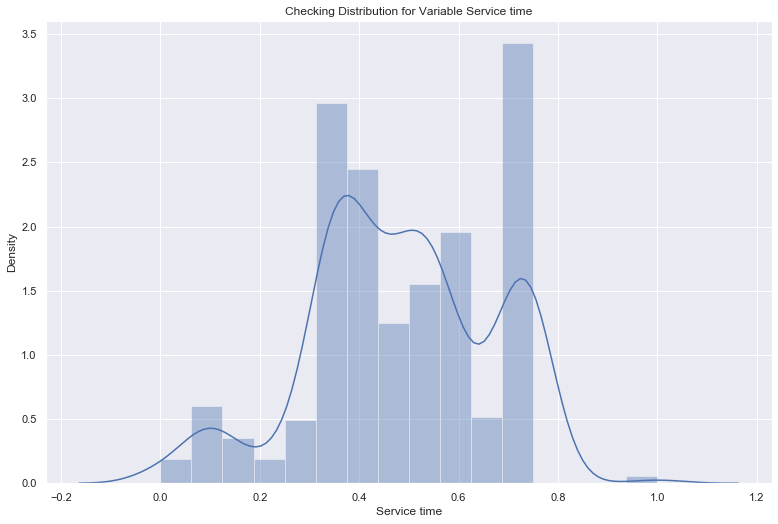

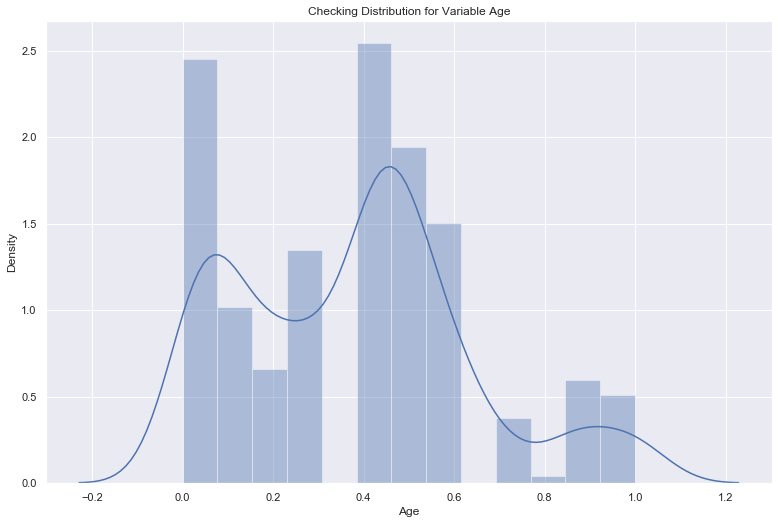

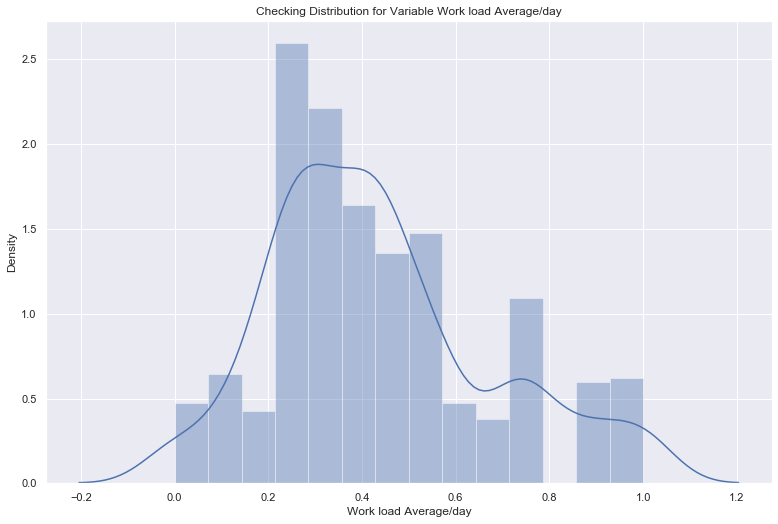

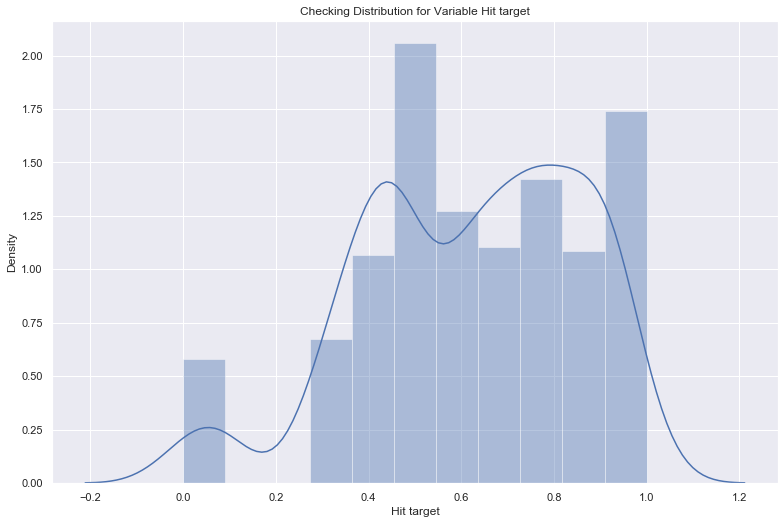

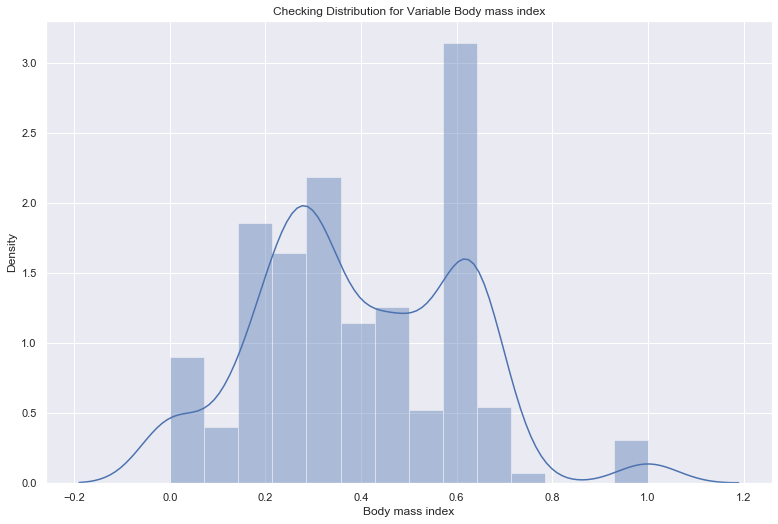

In [257]:
#Normality check
for i in conti_var:
    if i == 'Absenteeism time in hours':
        continue
    sns.distplot(data[i],bins = 'auto')
    plt.title("Checking Distribution for Variable "+str(i))
    plt.ylabel("Density")
    plt.show()

# MODELLING OF THE DATA

In [258]:
# Converting the categorical variables into dummy variables by one-hot encoding

#Create dummy variables of factor variables
data = pd.get_dummies(data = data, columns = categ_var)

# Copying dataframe
data_dummy = data.copy()

In [259]:
#Get number of rows and columns
data.shape

(588, 116)

In [261]:
data.head()

,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Body mass index,Absenteeism time in hours,ID_1,ID_2,ID_3,ID_4,ID_5,ID_6,ID_7,ID_8,ID_9,ID_10,ID_11,ID_12,ID_13,ID_14,ID_15,ID_16,ID_17,...,Seasons_3,Seasons_4,Disciplinary failure_0.0,Disciplinary failure_1.0,Education_1.0,Education_2.0,Education_3.0,Education_4.0,Son_0.0,Son_1.0,Son_1.037147102526003,Son_2.0,Son_3.0,Son_4.0,Social drinker_0.0,Social drinker_1.0,Social smoker_0.0,Social smoker_1.0,Pet_0.0,Pet_0.7503692762186115,Pet_1.0,Pet_2.0,Pet_4.0,Pet_5.0,Pet_8.0
0,0.657692,0.659574,0.521739,0.260870,0.244925,0.769231,0.578947,4.000000,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0
2,0.234615,0.978723,0.739130,0.478261,0.244925,0.769231,0.631579,2.000000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0
3,0.619231,0.000000,0.565217,0.521739,0.244925,0.769231,0.263158,4.000000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0
4,0.657692,0.659574,0.521739,0.260870,0.244925,0.769231,0.578947,2.000000,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0
5,0.234615,0.978723,0.739130,0.478261,0.244925,0.769231,0.631579,7.538813,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0


In [263]:
#Splitting data into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( data.iloc[:, data.columns != 'Absenteeism time in hours'], data.iloc[:, 7], test_size = 0.20, random_state = 1)

In [273]:
# ============== DECISION TREE MODELLING==================

# Importing libraries for Decision Tree 
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#Build decsion tree using DecisionTreeRegressor
dt_model = DecisionTreeRegressor(random_state = 1).fit(X_train,y_train)

#Perdict for test cases
dt_predictions = dt_model.predict(X_test)

#Create data frame for actual and predicted values
df_dt = pd.DataFrame({'actual': y_test, 'pred': dt_predictions})
print(df_dt.head())

#Define function to calculate RMSE
def RMSE(actual,pred):
    rmse = np.sqrt(mean_squared_error(actual,pred))
    return rmse

#Calculate RMSE and R-squared value
print("Root Mean Squared Error: "+str(RMSE(y_test, dt_predictions)))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test, dt_predictions)))

     actual  pred
635     2.0   3.0
706     8.0   1.0
26      1.0   4.0
696     3.0   3.0
101     8.0   4.0
Root Mean Squared Error: 4.290386981794712
R^2 Score(coefficient of determination) = -0.39747289192777924


In [274]:
# ===========RANDOM FOREST MODELLING===========

# Importing libraries for Random Forest
from sklearn.ensemble import RandomForestRegressor

#Build random forest using RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators = 500, random_state = 1).fit(X_train,y_train)

#Perdict for test cases
rf_predictions = rf_model.predict(X_test)

#Create data frame for actual and predicted values
df_rf = pd.DataFrame({'actual': y_test, 'pred': rf_predictions})
print(df_rf.head())

#Calculate RMSE and R-squared value
print("Root Mean Squared Error: "+str(RMSE(y_test, rf_predictions)))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test, rf_predictions)))

     actual      pred
635     2.0  5.757854
706     8.0  4.640078
26      1.0  4.260381
696     3.0  4.073434
101     8.0  3.992466
Root Mean Squared Error: 3.325807821051438
R^2 Score(coefficient of determination) = 0.16026015540217964


In [275]:
#  ==============LINEAR REGRESSION=============

from sklearn.linear_model import LinearRegression

#Train the model
lr_model = LinearRegression().fit(X_train , y_train)

#Perdict for test cases
lr_predictions = lr_model.predict(X_test)

#Create data frame for actual and predicted values
df_lr = pd.DataFrame({'actual': y_test, 'pred': lr_predictions})
print(df_lr.head())

#Calculate RMSE and R-squared value
print("Root Mean Squared Error: "+str(RMSE(y_test, lr_predictions)))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test, lr_predictions)))

     actual    pred
635     2.0  5.3125
706     8.0  8.9375
26      1.0  4.2500
696     3.0  5.2500
101     8.0  4.0625
Root Mean Squared Error: 12184422982905.084
R^2 Score(coefficient of determination) = -1.1270946651269334e+25


In [ ]:
# ===============DIMENSION REDUCTION USING PCA================

In [276]:
#Get the target variable
target = data['Absenteeism time in hours']

In [278]:
#Get the number of rows and columns of data
data.shape

(588, 116)

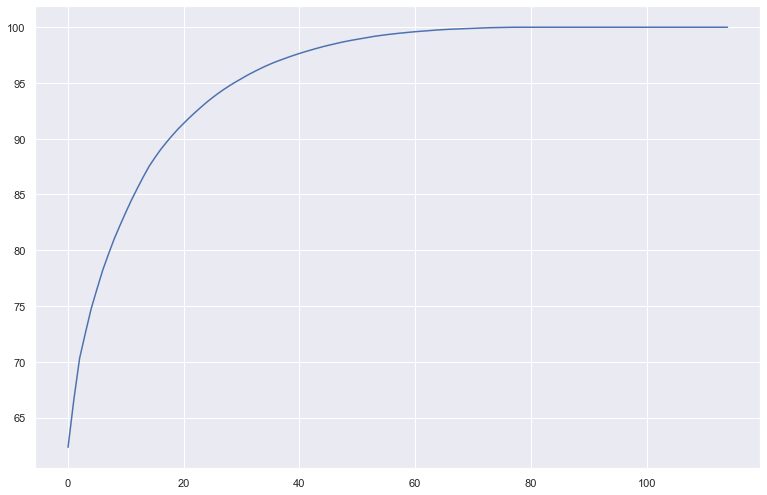

In [279]:
#Import library for PCA
from sklearn.decomposition import PCA

#Converting data to numpy array
X = data.values

#Data has 116 variables so no of components of PCA = 115
pca = PCA(n_components=115)
pca.fit(X)

#Proportion of variance explained
var= pca.explained_variance_ratio_

#Cumulative scree plot
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

#Draw the plot
plt.plot(var1)
plt.show()

In [280]:
#Selecting 40 components since it explains almost 95+ % data variance
pca = PCA(n_components=40)

#Fitting the selected components to the data
pca.fit(X)

#Splitting data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X,target, test_size=0.2, random_state = 1)

In [281]:
# ================DECISION TREE MODEL===============

#Build decsion tree using DecisionTreeRegressor
dt_model = DecisionTreeRegressor(random_state = 1).fit(X_train,y_train)

#Perdict for test cases
dt_predictions = dt_model.predict(X_test)

#Create data frame for actual and predicted values
df_dt = pd.DataFrame({'actual': y_test, 'pred': dt_predictions})
print(df_dt.head())

#Calculate RMSE and R-squared value
print("Root Mean Squared Error: "+str(RMSE(y_test, dt_predictions)))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test, dt_predictions)))

     actual  pred
635     2.0   2.0
706     8.0   8.0
26      1.0   1.0
696     3.0   3.0
101     8.0   8.0
Root Mean Squared Error: 4.905807056045877e-16
R^2 Score(coefficient of determination) = 1.0


In [282]:
#  ===================RANDOM FOREST MODELLING=============

#Build random forest using RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators = 500, random_state = 1).fit(X_train,y_train)

#Perdict for test cases
rf_predictions = rf_model.predict(X_test)

#Create data frame for actual and predicted values
df_rf = pd.DataFrame({'actual': y_test, 'pred': rf_predictions})
print(df_rf.head())

#Calculate RMSE and R-squared value
print("Root Mean Squared Error: "+str(RMSE(y_test, rf_predictions)))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test, rf_predictions)))

     actual  pred
635     2.0   2.0
706     8.0   8.0
26      1.0   1.0
696     3.0   3.0
101     8.0   8.0
Root Mean Squared Error: 0.007409039580835526
R^2 Score(coefficient of determination) = 0.9999958325126559


In [283]:
# =====================LINEAR REGREESION MODEL==============

# Importing libraries for Linear Regression
from sklearn.linear_model import LinearRegression

#Train the model
lr_model = LinearRegression().fit(X_train , y_train)

#Perdict for test cases
lr_predictions = lr_model.predict(X_test)

#Create data frame for actual and predicted values
df_lr = pd.DataFrame({'actual': y_test, 'pred': lr_predictions})
print(df_lr.head())

#Calculate RMSE and R-squared value
print("Root Mean Squared Error: "+str(RMSE(y_test, lr_predictions)))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test, lr_predictions)))

     actual  pred
635     2.0   2.0
706     8.0   8.0
26      1.0   1.0
696     3.0   3.0
101     8.0   8.0
Root Mean Squared Error: 0.01696621003785399
R^2 Score(coefficient of determination) = 0.9999781465434847
